<a href="https://colab.research.google.com/github/bunnyvilliers17/Big-5-Leagues/blob/main/Football.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#These are the absolutely essential cells and need to be run regardless of what you want to plot. Everywhere it says SHOW CODE, you will find a small black disc with a white triangle inside. Click on that disc to run the cell. Wait for the cell to run completely before moving on. Also, I thank Statsbomb and fbref (https://fbref.com/en/comps/Big5/Big-5-European-Leagues-Stats) for making the data available, without which this won't be possible

##All the imports

In [1]:
#@title
import pandas as pd
import sys
import csv
import numpy as np
pd.options.mode.chained_assignment = None
import os; import sys;
import tqdm
import requests
import mimetypes
import ipywidgets as widgets
import zipfile
import math
import ast
import json
from pandas import json_normalize
pd.set_option('display.max_columns', None)
from itertools import chain
from ast import literal_eval
import matplotlib.pyplot as plt
from io import StringIO, BytesIO
from matplotlib import rcParams
!pip install unidecode --q
import matplotlib.font_manager as fm
import matplotlib as mpl
from PIL import Image
!pip install highlight-text==0.0.5 --q
from highlight_text import ax_text, fig_text
!pip install adjustText --q
from adjustText import adjust_text
!pip install seaborn --q
import seaborn as sns
!pip install gdown --quiet
import gdown
from ipywidgets import interact, interactive, fixed, interact_manual
import matplotlib.patheffects as path_effects
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.floating_axes as floating_axes
import mpl_toolkits.axisartist.angle_helper as angle_helper
from matplotlib.projections import PolarAxes
from mpl_toolkits.axisartist.grid_finder import (FixedLocator, MaxNLocator,
                                                 DictFormatter)
import matplotlib.patches as patches

     |████████████████████████████████| 245kB 6.9MB/s 


##Download data files, fontfiles, logo

In [2]:
#@title

### The fonts
gdown.download('https://drive.google.com/uc?id=13ztlAubCFZN6TT3k6KFbgxuRWJSMdkaD',
               'slabo.ttf',quiet=True)
gdown.download('https://drive.google.com/uc?id=1l-uC5c6FWte1RWhI-3tCMQscKDKQHNVQ',
               'spectral.ttf',quiet=True)
gdown.download('https://drive.google.com/uc?id=1aUF9E87xWe9IL4hGGZbVSXqtb7QQsTMp',
               'spacegrotesk.ttf',quiet=True)
gdown.download('https://drive.google.com/uc?id=1i_wkthqp4-SLeQgyt__T71m6iqJbRBff',
               'rubik.ttf',quiet=True)
gdown.download('https://drive.google.com/uc?id=1hzV84z5YbhyM3YTy7-SNt3db2Ct9PfY6',
               'robotoslab.ttf',quiet=True)
gdown.download('https://drive.google.com/uc?id=1MqfLz6BqjBbJQ5awgTKyRn_2rd1RePUz',
               'neuton.ttf',quiet=True)
import matplotlib.font_manager as fm
fm.fontManager.addfont('slabo.ttf')
fm.fontManager.addfont('spectral.ttf')
fm.fontManager.addfont('spacegrotesk.ttf')
fm.fontManager.addfont('rubik.ttf')
fm.fontManager.addfont('robotoslab.ttf')
fm.fontManager.addfont('neuton.ttf')
fontlist = ['Roboto Slab','Rubik','Slabo 27px','Space Grotesk','Spectral']

#### The data files

gdown.download('https://drive.google.com/uc?id=1X619g-Q2537no2Dy95ov4myxMleKtIUi',
               'df201718.csv',quiet=True)
gdown.download('https://drive.google.com/uc?id=1w2VC3aRF3roKDypcL-_DtNrPhvtwnySm',
               'df201819.csv',quiet=True)
gdown.download('https://drive.google.com/uc?id=1vH7e8Ou8hkJjczIWxKCd7WwCLDUccyuN',
               'df201920.csv',quiet=True)
gdown.download('https://drive.google.com/uc?id=1z_cQvipJKEgygckDaqtpG_3X0nt-G_YB',
               'df202021.csv',quiet=True)

#### Fbref and Statsbomb logos

url1 = "https://drive.google.com/file/d/1cSeEq4PSyb6u92eGxcch7QrAvLEeTjwf/view?usp=sharing"
file_id = url1.split('/')[-2]
fbref_url='https://drive.google.com/uc?export=download&id=' + file_id
response = requests.get(fbref_url)
fbref = Image.open(BytesIO(response.content))
url2 = "https://drive.google.com/file/d/1HwdhRXaVMNwNXlMxiOS3afFRdM2Vz5ZV/view?usp=sharing"
file_id = url2.split('/')[-2]
sb_url='https://drive.google.com/uc?export=download&id=' + file_id
response = requests.get(sb_url)
sb = Image.open(BytesIO(response.content))

In [3]:
#@title

#Read the files into dataframes with some basic pre-processing

df201718 = pd.read_csv('df201718.csv',encoding = "ISO-8859-1")
df201819 = pd.read_csv('df201819.csv',encoding = "ISO-8859-1")
df201920 = pd.read_csv('df201920.csv',encoding = "ISO-8859-1")
df202021 = pd.read_csv('df202021.csv',encoding = "ISO-8859-1")

for dfs in [df201718,df201819,df201920,df202021]:
    dfs['Player'] = [dfs.Player[i].encode('latin-1').decode('unicode-escape').encode('latin-1').decode('utf-8')
                    for i in range(len(dfs))]
    dfs['PlayerNameSquad'] = [dfs.PlayerNameSquad[i].encode('latin-1').decode('unicode-escape').encode('latin-1').decode('utf-8')
                    for i in range(len(dfs))]

## Type in your twitter handle/username/name or leave it blank

In [4]:
#@title
textbox = widgets.Text(
    value='',
    placeholder='',
    description='Type your name/user name/twitter handle:',
    style={'description_width': 'initial'},
    layout={'width':'max-content'},
    disabled=False
)
textbox

Text(value='', description='Type your name/user name/twitter handle:', layout=Layout(width='max-content'), pla…

#The next set of cells are dedicated to creating simple scatter plots. If you are interested in swarm plots, or radars, please scroll down to the relevant section. Otherwise, continue

##Select season

In [5]:
#@title
seasonlist = ['2020-21','2019-20','2018-19','2017-18']
seasons = widgets.Dropdown(
      options=seasonlist,
      value='2020-21',
      rows=5,
      description='Choose Season',
      layout={'width':'max-content'},
      style={'description_width': 'initial'},
      disabled=False
  )
seasons

Dropdown(description='Choose Season', layout=Layout(width='max-content'), options=('2020-21', '2019-20', '2018…

In [6]:
#@title
seasonchoose = {'2020-21':df202021,'2019-20':df201920,'2018-19':df201819,'2017-18':df201718}
df = seasonchoose[seasons.value].copy()
df = df.rename(columns={'90s':'Nineties'}) 
players = df.Player.tolist()
positions = df.Position.unique().tolist()
Squad = df.Squad.unique().tolist()
competitions = df.Competition.unique().tolist()
smalllist = ['Player', 'Nation', 'Position', 'Squad', 'Competition','Age','Nineties',
             'Possesion%','PlayerNameSquad']
columns = [x for x in df.columns.tolist() if x not in smalllist]
if (type(df.Age[0])==str):
    df['Age'] = [int(df.Age[i].split('-')[0]) for i in range(len(df))]

##Select competition, position, and the two quantities for the scatter plot

In [7]:
#@title

comps = widgets.SelectMultiple(
    options=competitions,
    value=['es La Liga'],
    #rows=10,
    description='Competitions',
    disabled=False
)
pos = widgets.SelectMultiple(
    options=positions,
    value=['FW'],
    #rows=10,
    description='Positions',
    disabled=False
)
X = widgets.Dropdown(
    options=columns,
    value='xG',
    description='Quantity 1',
    disabled=False,
)
Y = widgets.Dropdown(
    options=columns,
    value='xA',
    description='Quantity 2',
    disabled=False,
)
box1 = widgets.HBox(children = [comps,pos,X,Y])
display(box1)

##Set minimum 90s played and age range requirements


In [8]:
#@title
nineties = widgets.FloatSlider(
    value=7.5,
    min=5,
    max=38.0,
    step=0.1,
    description='Nineties:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)
age = widgets.FloatRangeSlider(
    value=[df.Age.min(),df.Age.max()],
    min=df.Age.min(),
    max=df.Age.max(),
    step=0.1,
    description='Age range:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)
box2 = widgets.HBox(children = [nineties,age])
display(box2)

### Select players to highlight in the scatter plot. If you select more than 10 players, only the first ten will be displayed. Reminder : the more players you choose, the more cluttered the viz becomes; so do keep that in mind.


In [9]:
#@title
comp = box1.children[0].value
posi = box1.children[1].value
qty1 = box1.children[2].value
qty2 = box1.children[3].value
min90s = box2.children[0].value
agerange = box2.children[1].value

conditions1 = df.Competition.isin(comp)
conditions2 = df.Position.isin(posi)
conditions3 = df.Nineties >= min90s
conditions4 = (df.Age >= agerange[0])&(df.Age<=agerange[1]) 

players_available = df[conditions1 & conditions2 & conditions3 & conditions4].PlayerNameSquad.tolist()

highlight_players = widgets.SelectMultiple(
    options=players_available,
    value=[],
    rows=5,
    description='Highlight Player(s) : choose a maximum of 10',layout={'width':'max-content'},
    style={'description_width': 'initial'},
    disabled=False
)
highlight_players

SelectMultiple(description='Highlight Player(s) : choose a maximum of 10', layout=Layout(width='max-content'),…

In [10]:
highlight_players.value

('Nicolas Pépé ( Arsenal )', 'Anwar El Ghazi ( Aston Villa )')

## Now let's do some plot customizations. Choose background color, scatter color, text colors and font, and highlight player color. 


In [11]:
#@title
bgcolor = widgets.ColorPicker(
        concise=False,
        description='Pick background color',
        layout={'width':'max-content'},
        style={'description_width': 'initial'},
        value='#222222',
        disabled=False)

scat_col = widgets.ColorPicker(
        concise=False,
        description='Pick scatter color',
        layout={'width':'max-content'},
        style={'description_width': 'initial'},
        value='#d2d2e5',
        disabled=False
        )

text_col = widgets.ColorPicker(
        concise=False,
        description='Pick text color',
        layout={'width':'max-content'},
        style={'description_width': 'initial'},
        value='#ffffff',
        disabled=False
        )

grid_col = widgets.ColorPicker(
        concise=False,
        description='Pick grid color',
        layout={'width':'max-content'},
        style={'description_width': 'initial'},
        value='#ffffff',
        disabled=False
        )

highlight_col = widgets.ColorPicker(
        concise=False,
        description='Pick highlight color',
        layout={'width':'max-content'},
        style={'description_width': 'initial'},
        value='#d61f0a',
        disabled=False
        )

fontchoice = widgets.Dropdown(
    options=fontlist,
    value='Slabo 27px',
    description='Font',
    disabled=False,
)

topbox = widgets.HBox([bgcolor,scat_col,text_col])
bottombox = widgets.HBox([grid_col,highlight_col,fontchoice])
box3 = widgets.VBox(children=[topbox,bottombox])
display(box3)

## Invert axes or add median lines ? make your choice. Visuals typically try to portray the good stuff on the top right corner. So if you are portraying negative qualities like turnovers, you might want to reverse that axis

In [12]:
#@title
invert_x_axis = widgets.Dropdown(
    options=['Yes','No'],
    value='No',
    description='Invert x-axis ?',
    layout={'width':'max-content'},
    style={'description_width': 'initial'},
    disabled=False,
)
invert_y_axis = widgets.Dropdown(
    options=['Yes','No'],
    value='No',
    description='Invert y-axis ?',
    layout={'width':'max-content'},
    style={'description_width': 'initial'},
    disabled=False,
)
add_median = widgets.Dropdown(
    options=['Yes','No'],
    value='No',
    description='Add median lines ?',
    layout={'width':'max-content'},
    style={'description_width': 'initial'},
    disabled=False,
)
box4 = widgets.HBox(children=[invert_x_axis,invert_y_axis,add_median])
display(box4)

## Alright enough customizations; let's make the actual plot

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:123: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


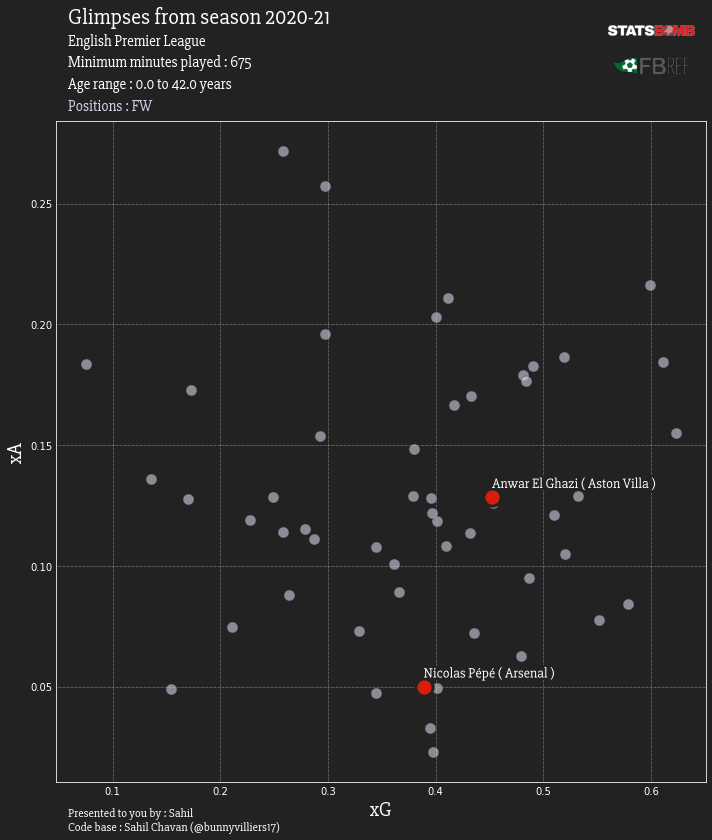

In [13]:
#@title
fig,ax = plt.subplots(figsize=(10,10))
ax.tick_params(axis='x', colors=text_col.value)
ax.tick_params(axis='y', colors=text_col.value)

fig.set_facecolor(bgcolor.value)
ax.patch.set_facecolor(bgcolor.value)
ax.grid(ls='dotted',lw=0.5,color=grid_col.value,zorder=1)

comp = box1.children[0].value
posi = box1.children[1].value
qty1 = box1.children[2].value
qty2 = box1.children[3].value
min90s = box2.children[0].value
agerange = box2.children[1].value

conditions1 = df.Competition.isin(comp)
conditions2 = df.Position.isin(posi)
conditions3 = df.Nineties >= min90s
conditions4 = (df.Age >= agerange[0])&(df.Age<=agerange[1]) 

compdict = {'de Bundesliga':'Bundesliga',
              'eng Premier League':'English Premier League',
              'es La Liga':'La Liga',
              'fr Ligue 1':'Ligue 1',
              'it Serie A':'Serie A'
           }

compsel = [compdict[comp[i]] for i in range(len(list(comp)))]
scatterdf = df[conditions1 & conditions2 & conditions3 & conditions4].reset_index(drop=True)

if(len(highlight_players.value)>10):
    hp = highlight_players.value[:10]
else:
    hp = highlight_players.value
    
PDf = scatterdf.query("PlayerNameSquad in @hp").reset_index(drop=True)
    
ax.scatter(scatterdf[qty1],scatterdf[qty2],s=120,color=scat_col.value,
           edgecolors=bgcolor.value,alpha=0.6,lw=0.5,zorder=2)

ax.scatter(PDf[qty1],PDf[qty2],s=300,color=highlight_col.value,
           edgecolors=bgcolor.value,alpha=1,lw=3,zorder=4)

if invert_x_axis.value=='Yes':
    ax.set_xlim(ax.get_xlim()[::-1])

if invert_y_axis.value=='Yes':
    ax.set_ylim(ax.get_ylim()[::-1])
    
if add_median.value=='Yes':
    x_median = np.median(scatterdf[qty1])
    y_median = np.median(scatterdf[qty2])
    ax.axhline(y_median, linestyle='--',lw=2,color=text_col.value)
    ax.axvline(x_median, linestyle='--',lw=2,color=text_col.value)

small_offset = (scatterdf[qty2].max() - scatterdf[qty2].min())/100.0

if len(hp)>0:
    xs = PDf[qty1].tolist()
    ys = PDf[qty2].tolist()
    labels = hp
  
    texts = []
    for x, y, s in zip(xs, ys, labels):
        text = ax.text(x, y+small_offset, s, color=text_col.value,fontsize=14,ha='center',zorder=5,
                            fontfamily=fontchoice.value)
        text.set_path_effects([path_effects.Stroke(linewidth=5, foreground=bgcolor.value),
                       path_effects.Normal()])
        texts.append(text)
        
    adjust_text(texts, force_points=0.1, force_text=0.1,
              expand_points=(1, 1), expand_text=(1, 1))

fig.text(0.1,0.0,'Presented to you by : '+textbox.value + '\n'+
         'Code base : Sahil Chavan (@bunnyvilliers17)',fontsize=12,color=text_col.value,
         fontfamily=fontchoice.value)

ax.set_xlabel(qty1, fontweight='bold', fontsize=20, color=text_col.value,fontfamily=fontchoice.value)
ax.set_ylabel(qty2, fontweight='bold', fontsize=20, color=text_col.value,fontfamily=fontchoice.value)
ax.tick_params(axis='both',length=0)

main_title = 'Glimpses from season '+str(seasons.value)

subtitle1 = ''
for i in range(len(compsel)):
    if(i==len(compsel)-1):
        subtitle1 += compsel[i]
    else:
        subtitle1 += compsel[i]+' | '
        
subtitle2 = 'Minimum minutes played : '+str(int(min90s*90))
subtitle3 = 'Age range : '+str(agerange[0])+' to '+str(agerange[1])+' years'
subtitle4 = 'Positions : '
for i in range(len(list(posi))):
    if(i==len(list(posi))-1):
        subtitle4 += list(posi)[i]
    else:
        subtitle4 += list(posi)[i]+' | '

fig.text(0.1,1.12,main_title,fontsize=22,fontweight='black',color=text_col.value,
             fontfamily=fontchoice.value)
fig.text(0.1,1.09,subtitle1,fontsize=15,color=text_col.value,
             fontfamily=fontchoice.value)
fig.text(0.1,1.06,subtitle2,fontsize=15,color=text_col.value,
             fontfamily=fontchoice.value)
fig.text(0.1,1.03,subtitle3,fontsize=15,color=text_col.value,
             fontfamily=fontchoice.value)
fig.text(0.1,1,subtitle4,fontsize=15,color=scat_col.value,
             fontfamily=fontchoice.value)

spines = ['top','right','bottom','left']
for s in spines:
    ax.spines[s].set_color(text_col.value)
    
ax2 = fig.add_axes([0.85,1.,0.12,0.12])
ax2.axis('off')
ax2.imshow(fbref)
ax3 = fig.add_axes([0.85,1.05,0.12,0.12])
ax3.axis('off')
ax3.imshow(sb)

plt.tight_layout()

##In case you are curious about some of the dots you didn't select to highlight, run the following cell to print out the names of the top 10 players by each category/quantity

In [ ]:
#@title
print("The top 10 players sorted in decreasing order by "+qty1)
print(scatterdf.copy().sort_values(by=qty1,ascending=False).head(10)[[qty1,qty2,'PlayerNameSquad']])
print('\n')
print("The top 10 players sorted in decreasing order by "+qty2)
print(scatterdf.copy().sort_values(by=qty2,ascending=False).head(10)[[qty1,qty2,'PlayerNameSquad']])

The top 10 players sorted in decreasing order by Dribbles_Attempted
     Dribbles_Attempted  Dribbles_Success%                     PlayerNameSquad
82             7.312925               74.4             Adama Traoré ( Wolves )
162            7.159091               46.6         Kylian Mbappé ( Paris S-G )
171            6.000000               57.3            Luis Muriel ( Atalanta )
67             5.061728               53.7  Marcus Rashford ( Manchester Utd )
116            5.022831               54.5     Vinicius Júnior ( Real Madrid )
76             4.901961               58.0           Gareth Bale ( Tottenham )
167            4.656489               49.2      Wahbi Khazri ( Saint-Étienne )
217            4.635762               57.1            Kevin Agudelo ( Spezia )
95             4.583333               61.4              Diego Lainez ( Betis )
22             4.555556               56.1      Justin Kluivert ( RB Leipzig )


The top 10 players sorted in decreasing order by Dribbles_Suc

In [ ]:
scatterdf[scatterdf[qty1]>3].copy().sort_values(by=[qty1,qty2],ascending=False)[[qty1,qty2,'PlayerNameSquad']]

,Dribbles_Attempted,Dribbles_Success%,PlayerNameSquad
82,7.312925,74.4,Adama Traoré ( Wolves )
162,7.159091,46.6,Kylian Mbappé ( Paris S-G )
171,6.000000,57.3,Luis Muriel ( Atalanta )
67,5.061728,53.7,Marcus Rashford ( Manchester Utd )
116,5.022831,54.5,Vinicius Júnior ( Real Madrid )
76,4.901961,58.0,Gareth Bale ( Tottenham )
167,4.656489,49.2,Wahbi Khazri ( Saint-Étienne )
217,4.635762,57.1,Kevin Agudelo ( Spezia )
95,4.583333,61.4,Diego Lainez ( Betis )
22,4.555556,56.1,Justin Kluivert ( RB Leipzig )


#That wraps up the scatter plots section. Next up, swarm plots. The design inspiration comes entirely from Peter McKeever's swarm plots, and has been created under Jon Ollington's tutelage and general viz advice. If you are looking for radar plots, move on to the next section. Otherwise, continue

##Select season

In [ ]:
#@title
seasonlist = ['2020-21','2019-20','2018-19','2017-18']
seasons = widgets.Dropdown(
      options=seasonlist,
      value='2020-21',
      rows=5,
      description='Choose Season',
      layout={'width':'max-content'},
      style={'description_width': 'initial'},
      disabled=False
  )
seasons

Dropdown(description='Choose Season', layout=Layout(width='max-content'), options=('2020-21', '2019-20', '2018…

In [ ]:
#@title
seasonchoose = {'2020-21':df202021,'2019-20':df201920,'2018-19':df201819,'2017-18':df201718}
df = seasonchoose[seasons.value].copy()
df = df.rename(columns={'90s':'Nineties'}) 
players = df.Player.tolist()
positions = df.Position.unique().tolist()
Squad = df.Squad.unique().tolist()
competitions = df.Competition.unique().tolist()
smalllist = ['Player', 'Nation', 'Position', 'Squad', 'Competition','Age','Nineties',
             'Possesion%','PlayerNameSquad']
columns = [x for x in df.columns.tolist() if x not in smalllist]
if (type(df.Age[0])==str):
    df['Age'] = [int(df.Age[i].split('-')[0]) for i in range(len(df))]

## We are going to separate out the datafile columns into types

In [ ]:
#@title
shootingcols = ['Goals',
 'Shots',
 'Shots_on_Target',
 'Shots_on_Target%',
 'Goals/Shot',
 'Goals/Shots_on_Target',
 'Shot_Distance',
 'Freekicks',
 'Penalties_scored',
 'Penalties_attempted',
 'xG',
 'NpxG',
 'NpxG/Shot',
 'Goals-xG',
 'NpGoals-xG',
 'npG','NpxG+xA',
 'NpG+A']

passingcols = ['Passes_Completed',
 'Passes_Attempted',
 'Pass_Completion%',
 'Passes_TotalDistance',
 'Passes_ProgressiveDistance',
 'Shortpasses_Completed',
 'Shortpasses_Attempted',
 'Shortpass_Completion%',
 'Mediumpasses_Completed',
 'Mediumpasses_Attempted',
 'Mediumpass_Completion%',
 'Longpasses_Completed',
 'Longpasses_Attempted',
 'Longpass_Completion%',
              'KeyPasses',
 'Passes_into_finalthird',
 'Passes_into_box',
 'Crosses_into_box',
 'Progressive_passes',
 'Live_Passes',
 'Dead_ball_passes',
 'FreeKick_passes',
 'ThroughBalls',
 'Under_Pressure_passes',
 'Switches',
 'Crosses',
 'CornerKick_passes',
 'CornerKicks_Inswinging',
 'CornerKicks_Outswinging',
 'CornerKicks_Straight',
 'Ground_passes',
 'Low_passes',
 'High_passes',
 'Passes_Leftfoot',
 'Passes_Rightfoot',
 'Head_passes',
 'ThrowIns',
 'Passes_other_body_parts',
 'Offside_passes']

creationcols = ['Assists',
 'xA',
 'Assists-xA','SCA',
 'SCA_PassLive',
 'SCA_PassDead',
 'SCA_Dribbles',
 'SCA_Shots',
 'SCA_Fouls_drawn',
 'SCA_Defensive_actions',
 'GCA',
 'GCA_PassLive',
 'GCA_PassDead',
 'GCA_Dribbles',
 'GCA_Shots',
 'GCA_Fouls_drawn',
 'GCA_Defensive_actions',
 'GCA_OwnGoals']

possessioncols = ['Touches',
 'Touches_Def_Pen',
 'Touches_Def_3rd',
 'Touches_Mid_3rd',
 'Touches_Att_3rd',
 'Touches_Att_Pen',
 'Touches_Live',
 'Dribbles_Successful',
 'Dribbles_Attempted',
 'Dribbles_Success%',
 '#Players_dribbled_past',
 'Nutmegs',
 'Carries',
 'Carries_TotalDistance',
 'Carries_ProgressiveDistance',
 'Carries_Progressive',
 'Carries_into_final3rd',
 'Carries_into_box','Pass_Target',
 'Passes_Received',
 'Pass_Receive%',
 'Progressive_Passes_Received',
 'Progressions',
 'Fouled']

defcols = ['Tackles_Attempted',
 'Tackles_Won',
 'Tackles_Def_3rd',
 'Tackles_Mid_3rd',
 'Tackles_Att_3rd',
 'Dribblers_Tackled',
 'Dribbles_Contested',
 'Dribblers_Tackled%',
 'Pressures',
 'Successful_pressures',
 'Pressures_success%',
 'Pressures_Def_3rd',
 'Pressures_Mid_3rd',
 'Pressures_Att_3rd',
 'Blocks',
 'Blocks_Shots',
 'Blocks_Shots_on_target',
 'Blocks_Pass',
 'Interceptions',
 'Tackles+Interceptions',
 'Clearances','Ball_Recoveries',
 'Aerial Duels_Won',
 'Aerial Duels_Won%','TrueTackle',
 'TrueTackleWin%',
 'PAdj TrueTackle',
 'PAdj Tackles_Attempted',
 'PAdj Tackles_Won',
 'PAdj Tackles_Def_3rd',
 'PAdj Tackles_Mid_3rd',
 'PAdj Tackles_Att_3rd',
 'PAdj Pressures',
 'PAdj Successful_pressures',
 'PAdj Pressures_Def_3rd',
 'PAdj Pressures_Mid_3rd',
 'PAdj Pressures_Att_3rd',
 'PAdj Blocks',
 'PAdj Blocks_Shots',
 'PAdj Blocks_Shots_on_target',
 'PAdj Blocks_Pass',
 'PAdj Interceptions',
 'PAdj Tackles+Interceptions',
 'PAdj Clearances']

negativecols = ['Dribbled_Past',
'Aerial Duels_Lost',
 'Miscontrols',
'Yellow_Cards',
 'Red_Cards',
 'Second_Yellow_Card',
 'Fouls',
'Offsides',
'OwnGoals',
'Turnover',
'Turnovers_per_100Touches']

## Select competition, position, 90s, age range and quantities to plot. Please select only upto 6 quantities. If you select more than 6, only the first 6 will be chosen for the plot


In [ ]:
#@title
comps = widgets.SelectMultiple(
    options=competitions,
    value=['es La Liga'],
    #rows=10,
    description='Competitions',
    disabled=False
)
pos = widgets.SelectMultiple(
    options=positions,
    value=['FW'],
    #rows=10,
    description='Positions',
    disabled=False
)
nineties = widgets.FloatSlider(
    value=7.5,
    min=5,
    max=38.0,
    step=0.1,
    description='Nineties:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)
age = widgets.FloatRangeSlider(
    value=[df.Age.min(),df.Age.max()],
    min=df.Age.min(),
    max=df.Age.max(),
    step=0.1,
    description='Age range:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

shooting = widgets.SelectMultiple(
    options=shootingcols,
    value=[],
    #rows=10,
    description='Shot-related',
    disabled=False
)

passing = widgets.SelectMultiple(
    options=passingcols,
    value=[],
    #rows=10,
    description='Pass-related',
    disabled=False
)

creation = widgets.SelectMultiple(
    options=creationcols,
    value=[],
    #rows=10,
    description='Creativity',
    disabled=False
)

possession = widgets.SelectMultiple(
    options=possessioncols,
    value=[],
    #rows=10,
    description='Possession',
    disabled=False
)

defence = widgets.SelectMultiple(
    options=defcols,
    value=[],
    #rows=10,
    description='Defence',
    disabled=False
)

negative = widgets.SelectMultiple(
    options=negativecols,
    value=[],
    #rows=10,
    description='Negative Attributes',
    disabled=False
)

topbox = widgets.HBox(children = [comps,pos,nineties,age])
bottombox = widgets.HBox(children = [shooting,passing,creation])
lowestbox = widgets.HBox(children = [possession,defence,negative])
box5 = widgets.VBox(children=[topbox,bottombox,lowestbox])
display(box5)

In [ ]:
#@title
stats = list(shooting.value)+list(passing.value)+list(creation.value)+list(possession.value)+\
           list(defence.value)+list(negative.value)
if(len(list(stats))>6):
    print("Number of stats chosen : "+str(len(list(stats)))+". Please select a maximum of"+
     " 6 otherwise the first 6 will be chosen")
else:
    print("Number of stats chosen : "+str(len(list(stats))))

Number of stats chosen : 2


## Select a maximum of two players for comparison

In [ ]:
#@title
comp = comps.value
posi = pos.value
min90s = nineties.value
agerange = age.value

conditions1 = df.Competition.isin(comp)
conditions2 = df.Position.isin(posi)
conditions3 = df.Nineties >= min90s
conditions4 = (df.Age >= agerange[0])&(df.Age<=agerange[1]) 

players_available = df[conditions1 & conditions2 & conditions3 & conditions4].PlayerNameSquad.tolist()

compareplayers = widgets.SelectMultiple(
    options=players_available,
    value=[],
    rows=5,
    description='Highlight Player(s) : choose a maximum of 2',layout={'width':'max-content'},
    style={'description_width': 'initial'},
    disabled=False
)
compareplayers

SelectMultiple(description='Highlight Player(s) : choose a maximum of 2', layout=Layout(width='max-content'), …

## Now let's do some plot customizations. Choose background color, scatter color, text colors and font,and highlight player color.

In [ ]:
#@title 

bgcolor = widgets.ColorPicker(
        concise=False,
        description='Pick background color',
        value='#222222',
        disabled=False)

scat_col = widgets.ColorPicker(
        concise=False,
        description='Pick scatter color',
        value='#d2d2e5',
        disabled=False
        )

text_col = widgets.ColorPicker(
        concise=False,
        description='Pick text color',
        value='#ffffff',
        disabled=False
        )

highlight_col1 = widgets.ColorPicker(
        concise=False,
        description='Pick highlight color 1',
        value='#ffffff',
        disabled=False
        )

highlight_col2 = widgets.ColorPicker(
        concise=False,
        description='Pick highlight color 2',
        value='#d61f0a',
        disabled=False
        )

fontchoice = widgets.Dropdown(
    options=fontlist,
    value='Slabo 27px',
    description='Font',
    disabled=False,
)

topbox = widgets.HBox([bgcolor,scat_col,text_col])
bottombox = widgets.HBox([highlight_col1,highlight_col2,fontchoice])
box6 = widgets.VBox(children=[topbox,bottombox])
display(box6)

## Reverse any of the axes; typically done for the negative qualities like Turnovers. 

In [ ]:
#@title
statvals = list(shooting.value)+list(passing.value)+list(creation.value)+list(possession.value)+\
           list(defence.value)+list(negative.value)

axesreverse = widgets.SelectMultiple(
    options=statvals,
    value=[],
    rows=5,
    description='Reverse the axes for any of the selected quantity',layout={'width':'max-content'},
    style={'description_width': 'initial'},
    disabled=False
)
axesreverse

SelectMultiple(description='Reverse the axes for any of the selected quantity', layout=Layout(width='max-conte…

## Swarm plotter. Note that if you select 5 or 6 quantities, the resulting image will be big, so make sure to scroll haha.


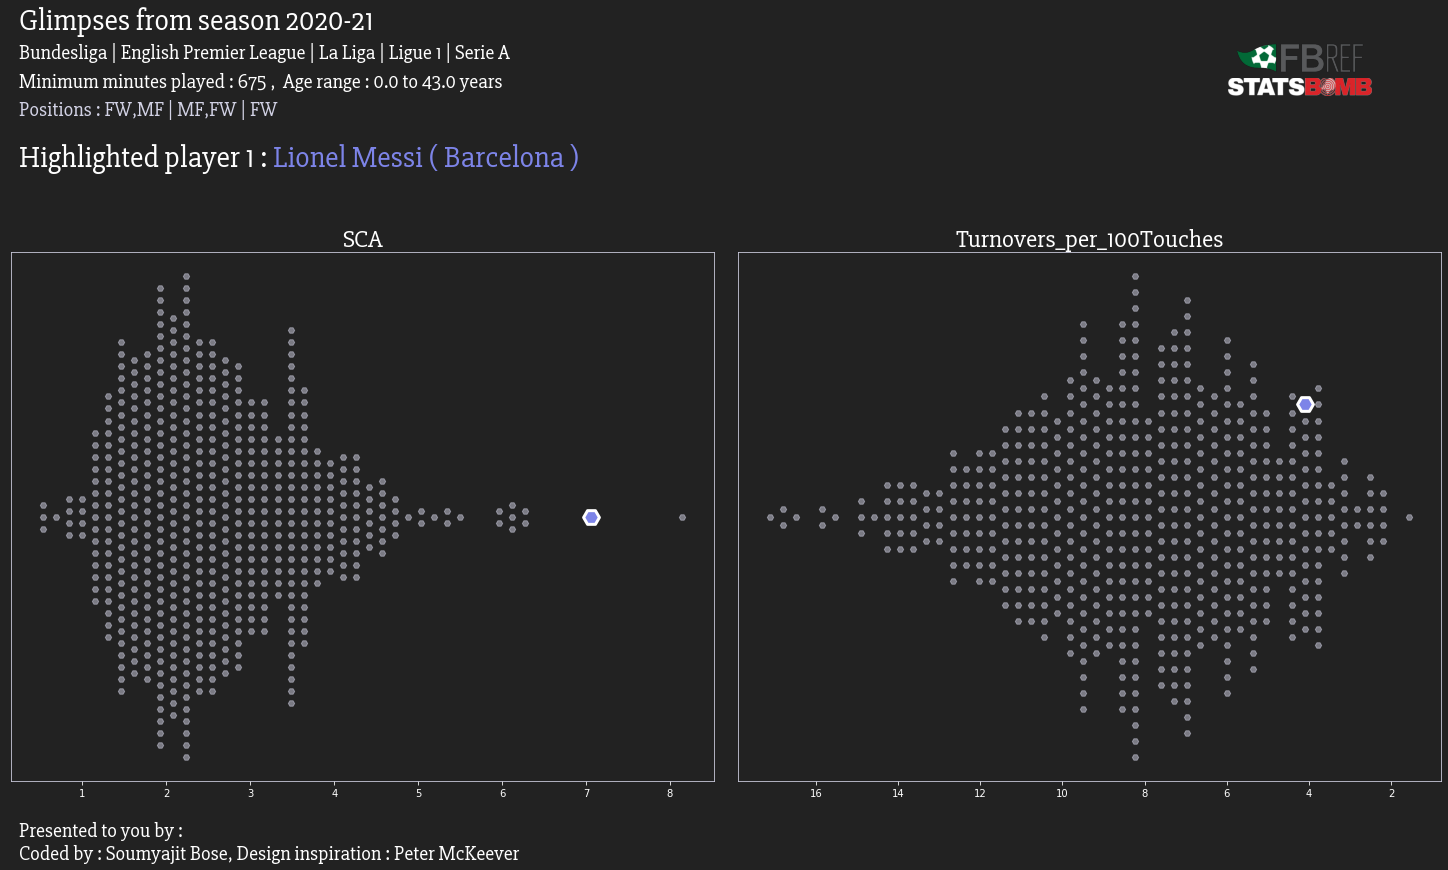

In [ ]:
#@title
statvals = list(shooting.value)+list(passing.value)+list(creation.value)+list(possession.value)+\
           list(defence.value)+list(negative.value)

highlight_colors = [highlight_col1.value,highlight_col2.value]

if(len(statvals)>6):
    statvals = statvals[:6]
    
playernames = compareplayers.value
if len(playernames)>2:
    playernames = playernames[:2]
    
def swarmplotter(swarmDf,q,ax,playernames):
    Df = swarmDf.copy()
    Df = Df.sort_values(by=[q]).reset_index(drop=True)
    hist,bins = np.histogram(Df[q],bins=50)
    delta = bins[1]-bins[0]
    
    for j in range(50):
        nc = hist[j]
        ycoords = [(nc-2*i) for i in range(nc)]
        xcoords = [bins[j] for i in range(nc)]
        ax.scatter(xcoords,ycoords,s=40,color=scat_col.value,
                   marker='H',alpha=0.5)
    numbahlist = []
    for p in playernames:
        qval = Df[Df.PlayerNameSquad==p][q].values[0]
        numbah = int(np.floor((qval-bins[0])/delta))
        if numbah==50:
            numbah=49
        presence = numbahlist.count(numbah)
        ax.scatter(bins[numbah],hist[numbah]-2*(presence),s=250,color=highlight_colors[playernames.index(p)],
                   marker='H',edgecolors=text_col.value,lw=3,zorder=4)
        numbahlist.append(numbah)
        
    ax.spines['top'].set_color(scat_col.value)
    ax.spines['right'].set_color(scat_col.value)
    ax.spines['left'].set_color(scat_col.value)
    ax.spines['bottom'].set_color(scat_col.value)
    ax.set_yticks([])
    ax.set_xlabel(None)
    ax.set_title(q,fontsize=25,color=text_col.value,fontfamily=fontchoice.value)
    ax.tick_params(axis='x', colors=text_col.value)
    ax.tick_params(axis='y', colors=text_col.value)
    if q in list(axesreverse.value):
        ax.set_xlim(ax.get_xlim()[::-1])
    return ax

# Plotting the attacking strip plots
comp = comps.value
posi = pos.value
min90s = nineties.value
agerange = age.value

conditions1 = df.Competition.isin(comp)
conditions2 = df.Position.isin(posi)
conditions3 = df.Nineties >= min90s
conditions4 = (df.Age >= agerange[0])&(df.Age<=agerange[1]) 

swarmDf = df[conditions1 & conditions2 & conditions3 & conditions4].reset_index(drop=True)

rows = (len(statvals)-1)//2+1
if(len(statvals)==1):
    cols = 1
else:
    cols = 2
    
fig,ax = plt.subplots(rows,cols,figsize=(10*cols,8*rows),
                     constrained_layout=True)
fig.set_facecolor(bgcolor.value)

for i in range(len(statvals)):
    if(len(statvals)==1):
        ax.patch.set_facecolor(bgcolor.value)
        swarmplotter(swarmDf,statvals[i],ax,playernames)
    elif(rows==1):
        ax[i%2].patch.set_facecolor(bgcolor.value)
        swarmplotter(swarmDf,statvals[i],ax[i%2],playernames)
    else:
        ax[i//2][i%2].patch.set_facecolor(bgcolor.value)
        swarmplotter(swarmDf,statvals[i],ax[i//2][i%2],playernames)
        
for i in range(len(statvals),rows*2):
    if(i==1):
        break
    elif(rows==1):
        ax[i%2].remove()
    else:
        ax[i//2][i%2].remove()
        
# fig.tight_layout()

compdict = {'de Bundesliga':'Bundesliga',
              'eng Premier League':'English Premier League',
              'es La Liga':'La Liga',
              'fr Ligue 1':'Ligue 1',
              'it Serie A':'Serie A'
           }

compsel = [compdict[comp[i]] for i in range(len(list(comp)))]
main_title = 'Glimpses from season '+str(seasons.value)

subtitle1 = ''
for i in range(len(compsel)):
    if(i==len(compsel)-1):
        subtitle1 += compsel[i]
    else:
        subtitle1 += compsel[i]+' | '
        
subtitle2 = 'Minimum minutes played : '+str(int(min90s*90)) +\
            ' ,  Age range : '+str(agerange[0])+' to '+str(agerange[1])+' years'
subtitle3 = 'Positions : '
for i in range(len(list(posi))):
    if(i==len(list(posi))-1):
        subtitle3 += list(posi)[i]
    else:
        subtitle3 += list(posi)[i]+' | '
        
mainsize = [25,30,35,40]
subsize = [15,20,25,30]
hts1 = [0.05,0.05,0.03,0.02]
hts2 = [0.05,0.05,0.03,0.02]

ypos = [1.095,1.09,1.095,1.095]
bpos = [-0.1,-0.1,-0.07,-0.05]

def title_printer(ms,ss,ht1,ht2,yp,bp):
    fig.text(0.01,yp+5*ht1,main_title,fontsize=ms,fontweight='bold',color=text_col.value,
         fontfamily=fontchoice.value)
    fig.text(0.01,yp+4*ht1,subtitle1,fontsize=ss,color=text_col.value,
                 fontfamily=fontchoice.value)
    fig.text(0.01,yp+3*ht1,subtitle2,fontsize=ss,color=text_col.value,
                 fontfamily=fontchoice.value)
    fig.text(0.01,yp+2*ht1,subtitle3,fontsize=ss,color=scat_col.value,
         fontfamily=fontchoice.value)
    for i in range(len(playernames)):
        fig_text(s = "Highlighted player "+str(i+1)+" : "+f"<{playernames[i]}>",x = 0.01, y = yp-i*ht2,
                highlight_colors = [highlight_colors[i]],highlight_weights=['bold'],
                fontsize=ms,color=text_col.value,fontfamily=fontchoice.value)
    ax2 = fig.add_axes([0.85,yp+3*ht1,0.1,0.1])
    ax2.axis('off')
    ax2.imshow(fbref)
    ax3 = fig.add_axes([0.85,yp+2*ht1,0.1,0.1])
    ax3.axis('off')
    ax3.imshow(sb)

    fig.text(0.01,bp,'Presented to you by : '+textbox.value+'\n'+'Coded by : Sahil Chavan, '+
             'Design inspiration : Peter McKeever',fontsize=ss,
             fontfamily=fontchoice.value,color=text_col.value)
    
    
if(len(statvals)==1):
    title_printer(mainsize[0],subsize[0],hts1[0],hts2[0],ypos[0],bpos[0])
elif(len(statvals)<=2):
    title_printer(mainsize[1],subsize[1],hts1[1],hts2[0],ypos[1],bpos[1])
elif((len(statvals)>2)&(len(statvals)<5)):
    title_printer(mainsize[2],subsize[2],hts1[2],hts2[0],ypos[2],bpos[2])
else:
    title_printer(mainsize[3],subsize[3],hts1[3],hts2[0],ypos[3],bpos[3])

# This section deals with making radar plots. I have chosen to do it the legendary Tom Worville and Football Slices way, after lots of tinkering with different designs and a sleepless night fighting with polar plots in matplotlib.   

## Select season


In [ ]:
#@title
seasonlist = ['2020-21','2019-20','2018-19','2017-18']
seasons = widgets.Dropdown(
      options=seasonlist,
      value='2020-21',
      rows=5,
      description='Choose Season',
      layout={'width':'max-content'},
      style={'description_width': 'initial'},
      disabled=False
  )
seasons

Dropdown(description='Choose Season', layout=Layout(width='max-content'), options=('2020-21', '2019-20', '2018…

In [ ]:
#@title
seasonchoose = {'2020-21':df202021,'2019-20':df201920,'2018-19':df201819,'2017-18':df201718}
df = seasonchoose[seasons.value].copy()
df = df.rename(columns={'90s':'Nineties'}) 
players = df.Player.tolist()
positions = df.Position.unique().tolist()
Squad = df.Squad.unique().tolist()
competitions = df.Competition.unique().tolist()
smalllist = ['Player', 'Nation', 'Position', 'Squad', 'Competition','Age','Nineties',
             'Possesion%','PlayerNameSquad']
columns = [x for x in df.columns.tolist() if x not in smalllist]
if (type(df.Age[0])==str):
    df['Age'] = [int(df.Age[i].split('-')[0]) for i in range(len(df))]

## Separating the data columns out into different categories

In [ ]:
#@title
shootingcols = ['Goals',
 'Shots',
 'Shots_on_Target',
 'Shots_on_Target%',
 'Goals/Shot',
 'Goals/Shots_on_Target',
 'Shot_Distance',
 'Freekicks',
 'Penalties_scored',
 'Penalties_attempted',
 'xG',
 'NpxG',
 'NpxG/Shot',
 'Goals-xG',
 'NpGoals-xG',
 'npG','NpxG+xA',
 'NpG+A']

passingcols = ['Passes_Completed',
 'Passes_Attempted',
 'Pass_Completion%',
 'Passes_TotalDistance',
 'Passes_ProgressiveDistance',
 'Shortpasses_Completed',
 'Shortpasses_Attempted',
 'Shortpass_Completion%',
 'Mediumpasses_Completed',
 'Mediumpasses_Attempted',
 'Mediumpass_Completion%',
 'Longpasses_Completed',
 'Longpasses_Attempted',
 'Longpass_Completion%',
              'KeyPasses',
 'Passes_into_finalthird',
 'Passes_into_box',
 'Crosses_into_box',
 'Progressive_passes',
 'Live_Passes',
 'Dead_ball_passes',
 'FreeKick_passes',
 'ThroughBalls',
 'Under_Pressure_passes',
 'Switches',
 'Crosses',
 'CornerKick_passes',
 'CornerKicks_Inswinging',
 'CornerKicks_Outswinging',
 'CornerKicks_Straight',
 'Ground_passes',
 'Low_passes',
 'High_passes',
 'Passes_Leftfoot',
 'Passes_Rightfoot',
 'Head_passes',
 'ThrowIns',
 'Passes_other_body_parts',
 'Offside_passes']

creationcols = ['Assists',
 'xA',
 'Assists-xA','SCA',
 'SCA_PassLive',
 'SCA_PassDead',
 'SCA_Dribbles',
 'SCA_Shots',
 'SCA_Fouls_drawn',
 'SCA_Defensive_actions',
 'GCA',
 'GCA_PassLive',
 'GCA_PassDead',
 'GCA_Dribbles',
 'GCA_Shots',
 'GCA_Fouls_drawn',
 'GCA_Defensive_actions',
 'GCA_OwnGoals']

possessioncols = ['Touches',
 'Touches_Def_Pen',
 'Touches_Def_3rd',
 'Touches_Mid_3rd',
 'Touches_Att_3rd',
 'Touches_Att_Pen',
 'Touches_Live',
 'Dribbles_Successful',
 'Dribbles_Attempted',
 'Dribbles_Success%',
 '#Players_dribbled_past',
 'Nutmegs',
 'Carries',
 'Carries_TotalDistance',
 'Carries_ProgressiveDistance',
 'Carries_Progressive',
 'Carries_into_final3rd',
 'Carries_into_box','Pass_Target',
 'Passes_Received',
 'Pass_Receive%',
 'Progressive_Passes_Received',
 'Progressions',
 'Fouled']

defcols = ['Tackles_Attempted',
 'Tackles_Won',
 'Tackles_Def_3rd',
 'Tackles_Mid_3rd',
 'Tackles_Att_3rd',
 'Dribblers_Tackled',
 'Dribbles_Contested',
 'Dribblers_Tackled%',
 'Pressures',
 'Successful_pressures',
 'Pressures_success%',
 'Pressures_Def_3rd',
 'Pressures_Mid_3rd',
 'Pressures_Att_3rd',
 'Blocks',
 'Blocks_Shots',
 'Blocks_Shots_on_target',
 'Blocks_Pass',
 'Interceptions',
 'Tackles+Interceptions',
 'Clearances','Ball_Recoveries',
 'Aerial Duels_Won',
 'Aerial Duels_Won%','TrueTackle',
 'TrueTackleWin%',
 'PAdj TrueTackle',
 'PAdj Tackles_Attempted',
 'PAdj Tackles_Won',
 'PAdj Tackles_Def_3rd',
 'PAdj Tackles_Mid_3rd',
 'PAdj Tackles_Att_3rd',
 'PAdj Pressures',
 'PAdj Successful_pressures',
 'PAdj Pressures_Def_3rd',
 'PAdj Pressures_Mid_3rd',
 'PAdj Pressures_Att_3rd',
 'PAdj Blocks',
 'PAdj Blocks_Shots',
 'PAdj Blocks_Shots_on_target',
 'PAdj Blocks_Pass',
 'PAdj Interceptions',
 'PAdj Tackles+Interceptions',
 'PAdj Clearances']

negativecols = ['Dribbled_Past',
'Aerial Duels_Lost',
 'Miscontrols',
'Yellow_Cards',
 'Red_Cards',
 'Second_Yellow_Card',
 'Fouls',
'Offsides',
'OwnGoals',
'Turnover',
'Turnovers_per_100Touches']

## Select the type of radar (Forwards, Attacking mids/wingers/wingbacks, Central mids/Defensive mids/Wide mids, and defenders. I am sort of limited by the positions that fbref offers.) Also select upto 15 quantities from the different sets.

In [ ]:
#@title
fwds = ['FW','FW,MF']
amwwb = ['MF,FW','FW,MF','FW,DF','DF,FW']
cmdm = ['MF,FW', 'MF','MF,DF']
cbfbwb = ['DF','DF,FW','DF,MF']
radartypes = ['Forwards','Attacking Mids/Winger/Wingbacks','Central/Defensive/Wide Mids',
              'Centerbacks/Fullbacks/Wingbacks']
rtypes = widgets.Dropdown(
    options=radartypes,
    value='Forwards',
    #rows=10,
    description='Positions',
    disabled=False
)
shooting = widgets.SelectMultiple(
    options=shootingcols,
    value=[],
    #rows=10,
    description='Shot-related',
    disabled=False
)

passing = widgets.SelectMultiple(
    options=passingcols,
    value=[],
    #rows=10,
    description='Pass-related',
    disabled=False
)

creation = widgets.SelectMultiple(
    options=creationcols,
    value=[],
    #rows=10,
    description='Creativity',
    disabled=False
)

possession = widgets.SelectMultiple(
    options=possessioncols,
    value=[],
    #rows=10,
    description='Possession',
    disabled=False
)

defence = widgets.SelectMultiple(
    options=defcols,
    value=[],
    #rows=10,
    description='Defence',
    disabled=False
)

negative = widgets.SelectMultiple(
    options=negativecols,
    value=[],
    #rows=10,
    description='Negative Attributes',
    disabled=False
)

topbox = widgets.HBox(children = [rtypes])
bottombox = widgets.HBox(children = [shooting,passing,creation])
lowestbox = widgets.HBox(children = [possession,defence,negative])
box7 = widgets.VBox(children=[topbox,bottombox,lowestbox])
display(box7)

In [ ]:
#@title
stats = list(shooting.value)+list(passing.value)+list(creation.value)+list(possession.value)+\
           list(defence.value)+list(negative.value)
print("Number of stats chosen : "+str(len(list(stats))))

Number of stats chosen : 12


## Select upto two players, and the two colors for their radars

In [ ]:
#@title
if(rtypes.value=='Forwards'):
    positions = fwds
elif(rtypes.value=='Attacking Mids/Winger/Wingbacks'):
    positions = amwwb
elif(rtypes.value=='Central/Defensive/Wide Mids'):
    positions = cmdm
else:
    positions = cbfbwb
    
statvals = stats

Df = df.query("(Position in @positions)&(Nineties>=5.0)").reset_index(drop=True)
statcols = list(statvals)
for q in statcols:
    if q in list(negative.value):
        Df[f'Percentile{q}'] = 100-Df[q].rank(pct=True)*100
    else:
        Df[f'Percentile{q}'] = Df[q].rank(pct=True)*100
Df = Df[['PlayerNameSquad','Position']+statcols+[f'Percentile{q}' for q in statcols]]
player1 = widgets.Dropdown(
    options=Df.PlayerNameSquad.tolist(),
    value=Df.PlayerNameSquad[0],
    rows=5,
    description='Choose 1st player',
    layout={'width':'max-content'},
    style={'description_width': 'initial'},
    disabled=False
)
player2 = widgets.Dropdown(
    options=Df.PlayerNameSquad.tolist()+[''],
    value='',
    rows=5,
    description='Choose 2nd player : (optional)',
    layout={'width':'max-content'},
    style={'description_width': 'initial'},
    disabled=False
)
playerbox = widgets.HBox(children = [player1,player2])
display(playerbox)

In [ ]:
#@title
c1 = widgets.ColorPicker(
        concise=False,
        description='Color 1',
        value='#d67171',
        disabled=False
    )
c2 = widgets.ColorPicker(
        concise=False,
        description='Color 2',
        value='#8787e3',
        disabled=False
    )
cbox2 = widgets.HBox(children = [c1,c2])
display(cbox2)

## Now let's do some plot customizations. Choose background color,  text colors and font.

In [ ]:
#@title

bgcolor = widgets.ColorPicker(
        concise=False,
        description='Pick background color',
        layout={'width':'max-content'},
        style={'description_width': 'initial'},
        value='#222222',
        disabled=False)

text_col = widgets.ColorPicker(
        concise=False,
        description='Pick text color',
        layout={'width':'max-content'},
        style={'description_width': 'initial'},
        value='#ffffff',
        disabled=False
        )

fontchoice = widgets.Dropdown(
    options=fontlist,
    value='Slabo 27px',
    description='Font',
    disabled=False,
)

topbox = widgets.HBox([bgcolor,text_col,fontchoice])

display(topbox)

## Now make the actual plot

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:109: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


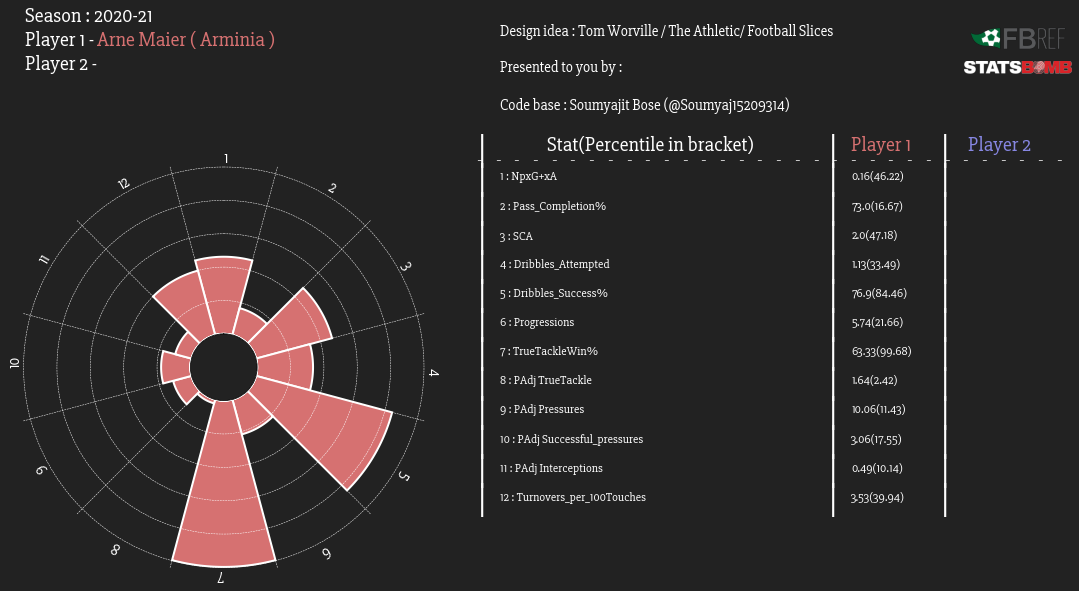

In [ ]:
#@title
p1 = playerbox.children[0].value
p2 = playerbox.children[1].value
percentilecols = [f'Percentile{q}' for q in statcols]
p1vals = [Df[Df.PlayerNameSquad==p1][qty].item() for qty in percentilecols]
p1raw = [Df[Df.PlayerNameSquad==p1][q].item() for q in statcols]
if(p2==''):
    p2vals = [0.0 for _ in range(len(p1vals))]
    p2raw = [0.0 for _ in range(len(p1vals))]
else:
    p2vals = [Df[Df.PlayerNameSquad==p2][qty].item() for qty in percentilecols]
    p2raw = [Df[Df.PlayerNameSquad==p2][q].item() for q in statcols]

arr1 = np.asarray(p1vals)
arr2 = np.asarray(p2vals)
N = len(p1vals)
bottom = 0.0
theta, width = np.linspace(0.0, 2 * np.pi, N, endpoint=False, retstep=True)

fig= plt.figure(figsize = (15, 8))
ax = plt.subplot(121, polar=True)
fig.set_facecolor(bgcolor.value)
ax.patch.set_facecolor(bgcolor.value)
ax.set_rorigin(-20)
bars = ax.bar(
    theta, height=arr1,
    width=width,
    bottom=bottom,
    color=c1.value, edgecolor="w",zorder=1,
    linewidth=2
)
bars2 = ax.bar(
    theta, arr2,
    width=width,
    bottom=bottom,
    color=c2.value, zorder=1,
    edgecolor='w',linewidth=2
)
for bar in bars:
    indx = bars.index(bar)
    if(arr1[indx]<=arr2[indx]):
        bar.set_zorder(1.5)

ax.set_rticks(np.arange(0.0, 120.0, 20.0))
ax.set_thetagrids((theta+width/2)* 180 / np.pi)
# ax.set_rlabel_position(-100)
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.grid(zorder=10.0,color='w', linestyle='--', linewidth=0.5)
ax.spines['polar'].set_visible(False)
# ax.set_rticks([])
ticks = [str(i+1) for i in range(len(statvals))]
ax.set_xticklabels([])
rotations = np.rad2deg(theta)
for x, bar, rotation, label in zip(theta, bars, rotations, ticks):
    lab = ax.text(x,105,label,ha='left', va='center',color=text_col.value,
                  rotation=-rotation,rotation_mode='anchor',fontsize=15,
                  fontfamily=fontchoice.value)   
ax.spines["polar"].set_color('w')
ax.spines["polar"].set_linewidth(2)
ax.set_yticklabels([])
ax2 = plt.subplot(122)
ax2.patch.set_facecolor(bgcolor.value)
ax2.axis('off')
ax2.text(0.15,1.02,'Stat(Percentile in bracket)',fontsize=20,color=text_col.value,
        fontfamily = fontchoice.value)
for i in range(len(statcols)+1):
	ax2.text(0,1.0-0.07*i,'|',fontsize=35,color=text_col.value,
        fontfamily = fontchoice.value)
for i in range(32):
	ax2.text(0+0.04*i,1,'_',fontsize=10,color=text_col.value,
        fontfamily = fontchoice.value)
for i in range(len(statcols)):
    ax2.text(0.05,0.95-0.07*i,str(i+1)+' : '+statcols[i],fontsize=12,
           color=text_col.value,fontfamily = fontchoice.value)
for i in range(len(statcols)+1):
	ax2.text(0.75,1.0-0.07*i,'|',fontsize=35,color=text_col.value,
        fontfamily = fontchoice.value)
ax2.text(0.8,1.02,'Player 1',fontsize=20,color=c1.value,
        fontfamily = fontchoice.value)
for i in range(len(statcols)+1):
	ax2.text(0.99,1.0-0.07*i,'|',fontsize=35,color=text_col.value,
        fontfamily = fontchoice.value)
ax2.text(1.05,1.02,'Player 2',fontsize=20,color=c2.value,
        fontfamily = fontchoice.value)
for i in range(len(statcols)):
    ax2.text(0.8,0.95-0.07*i,str(round(p1raw[i],2))+'('+str(round(p1vals[i],2))
                    +')',fontsize=12, color=text_col.value,fontfamily = fontchoice.value)
    if(p2!=''):
        ax2.text(1.05,0.95-0.07*i,str(round(p2raw[i],2))+'('+str(round(p2vals[i],2))
                    +')',fontsize=12, color=text_col.value,fontfamily = fontchoice.value)
ax3 = fig.add_axes([0.92,0.9,0.1,0.1])
ax3.axis('off')
ax3.imshow(fbref)
ax4 = fig.add_axes([0.92,0.85,0.1,0.1])
ax4.axis('off')
ax4.imshow(sb)
ax2.text(0.05,1.12,'Design idea : Tom Worville / The Athletic/ Football Slices'+'\n'+'\n'+
         'Presented to you by : '+textbox.value+'\n'+'\n'
         +'Code base : Sahil Chavan (@bunnyvilliers17)'
         ,fontsize=15,color=text_col.value,fontfamily = fontchoice.value)
P1 = p1
P2 = ''
if p2 !='':
    P2 = p2
fig_text(s = "Season : "+str(seasons.value)+'\n'+f"Player 1 - <{P1}>"+'\n'+f"Player 2 - <{P2}>",x = 0.05, y = 0.89,
            highlight_colors = [c1.value,c2.value],highlight_weights=['bold'],
            fontsize=20,color=text_col.value,fontfamily = fontchoice.value)
fig.tight_layout()

#Section for normalized diamond plots....under construction

In [ ]:
#@title
seasonlist = ['2020-21','2019-20','2018-19','2017-18']
seasons = widgets.Dropdown(
      options=seasonlist,
      value='2020-21',
      rows=5,
      description='Choose Season',
      layout={'width':'max-content'},
      style={'description_width': 'initial'},
      disabled=False
  )
seasons

In [ ]:
#@title
seasonchoose = {'2020-21':df202021,'2019-20':df201920,'2018-19':df201819,'2017-18':df201718}
df = seasonchoose[seasons.value].copy()
df = df.rename(columns={'90s':'Nineties'}) 
players = df.Player.tolist()
positions = df.Position.unique().tolist()
Squad = df.Squad.unique().tolist()
competitions = df.Competition.unique().tolist()
smalllist = ['Player', 'Nation', 'Position', 'Squad', 'Competition','Age','Nineties',
             'Possesion%','PlayerNameSquad']
columns = [x for x in df.columns.tolist() if x not in smalllist]

In [ ]:
#@title

comps = widgets.SelectMultiple(
    options=competitions,
    value=['es La Liga'],
    #rows=10,
    description='Competitions',
    disabled=False
)
pos = widgets.SelectMultiple(
    options=positions,
    value=['FW'],
    #rows=10,
    description='Positions',
    disabled=False
)
X = widgets.Dropdown(
    options=columns,
    value='xG',
    description='Quantity 1',
    disabled=False,
)
Y = widgets.Dropdown(
    options=columns,
    value='xA',
    description='Quantity 2',
    disabled=False,
)

#@title
nineties = widgets.FloatSlider(
    value=7.5,
    min=5,
    max=38.0,
    step=0.1,
    description='Nineties:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)
age = widgets.FloatRangeSlider(
    value=[df.Age.min(),df.Age.max()],
    min=df.Age.min(),
    max=df.Age.max(),
    step=0.1,
    description='Age range:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

# diamondbox2 = widgets.HBox(children = [nineties,age])
# display(box2)
# box1 = widgets.HBox(children = [comps,pos,X,Y])
# display(box1)

display(widgets.VBox(children=[widgets.HBox(children=[comps,pos,X,Y]),
                               widgets.HBox(children=[nineties,age])]))

In [ ]:
#@title
comp = comps.value
posi = pos.value
qty1 = X.value
qty2 = Y.value
min90s = nineties.value
agerange = age.value

conditions1 = df.Competition.isin(comp)
conditions2 = df.Position.isin(posi)
conditions3 = df.Nineties >= min90s
conditions4 = (df.Age >= agerange[0])&(df.Age<=agerange[1]) 

players_available = df[conditions1 & conditions2 & conditions3 & conditions4].PlayerNameSquad.tolist()

highlight_players = widgets.SelectMultiple(
    options=players_available,
    value=[],
    rows=5,
    description='Highlight Player(s) : choose a maximum of 10',layout={'width':'max-content'},
    style={'description_width': 'initial'},
    disabled=False
)
highlight_players

In [ ]:
#@title
bgcolor = widgets.ColorPicker(
        concise=False,
        description='Pick background color',
        layout={'width':'max-content'},
        style={'description_width': 'initial'},
        value='#222222',
        disabled=False)

scat_col = widgets.ColorPicker(
        concise=False,
        description='Pick scatter color',
        layout={'width':'max-content'},
        style={'description_width': 'initial'},
        value='#d2d2e5',
        disabled=False
        )

text_col = widgets.ColorPicker(
        concise=False,
        description='Pick text color',
        layout={'width':'max-content'},
        style={'description_width': 'initial'},
        value='#ffffff',
        disabled=False
        )

grid_col = widgets.ColorPicker(
        concise=False,
        description='Pick grid color',
        layout={'width':'max-content'},
        style={'description_width': 'initial'},
        value='#ffffff',
        disabled=False
        )

highlight_col = widgets.ColorPicker(
        concise=False,
        description='Pick highlight color',
        layout={'width':'max-content'},
        style={'description_width': 'initial'},
        value='#d61f0a',
        disabled=False
        )

fontchoice = widgets.Dropdown(
    options=fontlist,
    value='Slabo 27px',
    description='Font',
    disabled=False,
)

topbox = widgets.HBox([bgcolor,scat_col,text_col])
bottombox = widgets.HBox([grid_col,highlight_col,fontchoice])
box3 = widgets.VBox(children=[topbox,bottombox])
display(box3)

In [ ]:
#@title
invert_x_axis = widgets.Dropdown(
    options=['Yes','No'],
    value='No',
    description='Invert x-axis ?',
    layout={'width':'max-content'},
    style={'description_width': 'initial'},
    disabled=False,
)
invert_y_axis = widgets.Dropdown(
    options=['Yes','No'],
    value='No',
    description='Invert y-axis ?',
    layout={'width':'max-content'},
    style={'description_width': 'initial'},
    disabled=False,
)
add_median = widgets.Dropdown(
    options=['Yes','No'],
    value='No',
    description='Add median lines ?',
    layout={'width':'max-content'},
    style={'description_width': 'initial'},
    disabled=False,
)
display(widgets.HBox(children=[invert_x_axis,invert_y_axis,add_median]))

In [ ]:
#@title

def setup_axes1(fig, rect):
    """
    Rotated Axis
    """
    tr = Affine2D().scale(9, 9).rotate_deg(45)

    grid_helper = floating_axes.GridHelperCurveLinear(
        tr, extremes=(0, 1, 0, 1))

    ax1 = floating_axes.FloatingSubplot(fig, rect, grid_helper=grid_helper)
    fig.add_subplot(ax1)

    aux_ax = ax1.get_aux_axes(tr)

    grid_helper.grid_finder.grid_locator1._nbins = 10
    grid_helper.grid_finder.grid_locator2._nbins = 10

    return ax1, aux_ax


##########################################################

fig = plt.figure(1, figsize=(38, 15))
fig.subplots_adjust(wspace=1, left=0.5, right=2)

ax1, aux_ax1 = setup_axes1(fig, 131)


fig.set_facecolor(bgcolor.value)
ax1.patch.set_facecolor(bgcolor.value)
ax1.grid(ls='dotted',lw=0.5,color=grid_col.value,zorder=1)

plt.rc('axes',edgecolor=grid_col.value)
plt.tick_params(color='none')

#remove label colors
plt.rcParams['text.color'] = text_col.value
plt.rcParams['axes.labelcolor'] = text_col.value
# plt.rcParams['axes.labelsize'] = 'medium'

comp = comps.value
posi = pos.value
qty1 = X.value
qty2 = Y.value
min90s = nineties.value
agerange = age.value

conditions1 = df.Competition.isin(comp)
conditions2 = df.Position.isin(posi)
conditions3 = df.Nineties >= min90s
conditions4 = (df.Age >= agerange[0])&(df.Age<=agerange[1]) 

compdict = {'de Bundesliga':'Bundesliga',
              'eng Premier League':'English Premier League',
              'es La Liga':'La Liga',
              'fr Ligue 1':'Ligue 1',
              'it Serie A':'Serie A'
           }

compsel = [compdict[comp[i]] for i in range(len(list(comp)))]
scatterdf = df[conditions1 & conditions2 & conditions3 & conditions4].reset_index(drop=True)

if(len(highlight_players.value)>10):
    hp = highlight_players.value[:10]
else:
    hp = highlight_players.value
    
norm_x = (scatterdf[qty1]-scatterdf[qty1].min())/(scatterdf[qty1].max()-scatterdf[qty1].min())
norm_y = (scatterdf[qty2]-scatterdf[qty2].min())/(scatterdf[qty2].max()-scatterdf[qty2].min())

aux_ax1.scatter(norm_x, norm_y ,s=350, marker="o",facecolors=scat_col.value,zorder=4,
                alpha=0.65,ec=text_col.value,lw=1)

PDf = scatterdf.query("PlayerNameSquad in @hp").reset_index(drop=True)

norm_p_x = (PDf[qty1]-scatterdf[qty1].min())/(scatterdf[qty1].max()-scatterdf[qty1].min())
norm_p_y = (PDf[qty2]-scatterdf[qty2].min())/(scatterdf[qty2].max()-scatterdf[qty2].min())
    
aux_ax1.scatter(norm_p_x,norm_p_y,s=350,color=highlight_col.value,
           edgecolors=text_col.value,alpha=1,lw=3,zorder=5)

if invert_x_axis.value=='Yes':
    ax1.set_xlim(ax1.get_xlim()[::-1])

if invert_y_axis.value=='Yes':
    ax1.set_ylim(ax1.get_ylim()[::-1])
    
if add_median.value=='Yes':
    x_median = np.median(scatterdf[qty1])
    y_median = np.median(scatterdf[qty2])
    x_median = (x_median - scatterdf[qty1].min())/(scatterdf[qty1].max()-scatterdf[qty1].min())
    y_median = (y_median - scatterdf[qty2].min())/(scatterdf[qty2].max()-scatterdf[qty2].min())
    aux_ax1.plot([x_median,x_median],[0,1],color=text_col.value,zorder=3, lw=2,alpha=1, ls="--",dashes=(4,1))
    aux_ax1.plot([0,1],[y_median,y_median],color=text_col.value,zorder=3, lw=2,alpha=1, ls="--",dashes=(4,1))


small_offset = 0.01

if len(hp)>0:
    xs = ((PDf[qty1]- scatterdf[qty1].min())/(scatterdf[qty1].max()-scatterdf[qty1].min())).tolist()
    ys = ((PDf[qty2]- scatterdf[qty2].min())/(scatterdf[qty2].max()-scatterdf[qty2].min())).tolist()
    labels = hp
  
    texts = []
    for x, y, s in zip(xs, ys, labels):
        text = aux_ax1.text(x+small_offset, y+small_offset, s, color=text_col.value,fontsize=14,ha='center',zorder=5,
                            fontfamily=fontchoice.value)
        text.set_path_effects([path_effects.Stroke(linewidth=5, foreground=bgcolor.value),
                       path_effects.Normal()])
        texts.append(text)
        
    adjust_text(texts, force_points=0.1, force_text=0.1,
              expand_points=(1, 1), expand_text=(1, 1))

fig.text(0.5,0.1,'Presented to you by : '+textbox.value + '\n'+
         'Code base : Soumyajit Bose (@Soumyaj15209314)',fontsize=12,color=text_col.value,
         fontfamily=fontchoice.value)

ax1.set_xlabel("- "+qty1+" +", rotation=45, va='center', color=text_col.value,
         fontfamily=fontchoice.value, size=100)
ax1.set_ylabel("- "+qty2+" +", va='center', color=text_col.value,
         fontfamily=fontchoice.value, fontsize=100)



# aux_ax1.text(0.2,-0.05, "- "+qty1+" +", rotation=45, va='center', color=text_col.value,
#          fontfamily=fontchoice.value, fontsize=20)
# aux_ax1.text(-0.2,0.4, "+ "+qty2+" -", rotation=315, va='center',
#          color=text_col.value, fontfamily=fontchoice.value, fontsize=20)

main_title = 'Glimpses from season '+str(seasons.value)

subtitle1 = ''
for i in range(len(compsel)):
    if(i==len(compsel)-1):
        subtitle1 += compsel[i]
    else:
        subtitle1 += compsel[i]+' | '
        
subtitle2 = 'Minimum minutes played : '+str(int(min90s*90))
subtitle3 = 'Age range : '+str(agerange[0])+' to '+str(agerange[1])+' years'
subtitle4 = 'Positions : '
for i in range(len(list(posi))):
    if(i==len(list(posi))-1):
        subtitle4 += list(posi)[i]
    else:
        subtitle4 += list(posi)[i]+' | '

fig.text(0.5,0.97,main_title,fontsize=25,fontweight='black',color=text_col.value,
             fontfamily=fontchoice.value)
fig.text(0.5,0.94,subtitle1,fontsize=15,color=text_col.value,
             fontfamily=fontchoice.value)
fig.text(0.5,0.91,subtitle4,fontsize=15,color=scat_col.value,
             fontfamily=fontchoice.value)
fig.text(0.5,0.88,subtitle2,fontsize=15,color=text_col.value,
             fontfamily=fontchoice.value)
fig.text(0.5,0.85,subtitle3,fontsize=15,color=text_col.value,
             fontfamily=fontchoice.value)

spines = ['top','right','bottom','left']
for s in spines:
    aux_ax1.spines[s].set_color(text_col.value)
    
ax2 = fig.add_axes([0.75,0.9,0.05,0.05])
ax2.axis('off')
ax2.imshow(fbref)
ax3 = fig.add_axes([0.75,0.95,0.05,0.05])
ax3.axis('off')
ax3.imshow(sb)

# plt.tight_layout()